In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import matplotlib.ticker as ticker

In [5]:
import seaborn as sns

In [6]:
import os

In [7]:
import glob

In [8]:
import csv

In [9]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [12]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

## Project Title: Sales Analysis and Visualization

In [13]:
##### 1. Create a class called SalesAnalysis. The init method of the class takes as input file_path (the path to your data). 
##### The class has only one attribute df that represents the data frame of your data imported from pandas. 
##### PS : to be able to read the data add encoding='latin-1' to your read_csv()

#### 2.  Add the method clean_data() to your class. This method cleans the data and should include optional input parameters to 
#### allow the user to specify how to clean the data. It can contain missing values and duplicates that need to be handled
#### appropriately. You should also check the data types and convert them if necessary.
####(Order Date to datetime object ,Quantity to int,Sales to float)

class SalesAnalysis:
    
    def __init__(self, file_path):
        self.df = pd.read_csv(file_path, encoding='latin-1')
        
    def clean_data(self):
        print(self.df.isnull().sum())
        print(self.df.info())
        print(self.df.describe())
        print(self.df.duplicated())
        return print('End')
    
    def drop_columns(self,columnslist_todrop):
        self.df = self.df.drop(columns = columnslist_todrop)
    
    def rename_columns(self,newlist_columnnames):
        self.df.columns = (newlist_columnnames)
    
    def check_datatypes(self):
        print(self.df.dtypes())
        return print('End')
    
    def convert_datatypes(self, columnname_convert, newdatatype):
        if newdatatype == "datetime":
            self.df[columnname_convert] = pd.to_datetime(self.df[columnname_convert])
        elif newdatatype == "integer":
            self.df[columnname_convert] = pd.to_numeric(self.df[columnname_convert])
        else:
            print(f"covertion cannot be handled using this function")
            
    def add_yrmn_columns (self,columnname_convert):
        self.df['Year'] = self.df[columnname_convert].dt.year
        self.df['Month'] = self.df[columnname_convert].values.astype('datetime64[M]')
        
    def drop_duplicates(self,columnname_dropduplicates):
        self.df.sort_values(columnname_dropduplicates, inplace=True)
        self.df.drop_duplicates(keep=False, inplace=True)
        print(len(self.df))
        
    def info_cleaneddata(self,start_colindex,end_colindex):
        print(self.df.info())
        print(self.df.iloc[:,int(start_colindex):int(end_colindex)].describe())
        print('Number of columns :', len(self.df.columns))
    
    def write_on_csv(self, filename):
        self.df.to_csv(filename, index=False)
        return True
    
    def save_figure(self,filename):
        plt.savefig(filename)
        return print(f'the file is saved in the working directory')
    
##### 3. Add the method filter_by_date () to your class. This method takes in two optional parameters: start_date and end_date. 
#####    If both parameters are provided,it filters the data to only include rows where the Order Date column is between
#####    start_date and end_date.
##### 4. Add Data Analysis methods : 
#####    a. Implement the sales_by_category() and sales_by_region () methods to calculate sales by category
#####    and region respectively. These methods should include optional input parameters to allow 
#####    the user to specify which category or region to calculate the sales for.
#####    b. Implement the sales_by_subcategory() method to calculate the sales by subcategory. This method
#####    should include optional input parameters to allow the user to specify which subcategory to calculate the sales for.
#####    c. Implement the quantity_by_category () method to calculate the total quantity sold by category. 
#####    This method should include optional input parameters to allow the user to specify which category to calculate
#####    the quantity for.
#####    d. Implement the shipping_cost_by_region () method to calculate the total shipping cost by region.
#####    This method should include optional input parameters to allow the user to specify which region to calculate the
#####    shipping cost for.
#####    e. Implement the discount_by_subcategory () method to calculate the average discount by subcategory. 
#####    This method should include optional input parameters to allow the user to specify which subcategory to calculate the
#####    average discount for. 

        
    def filter_by_date(self,start_date='2010-12-31',end_date='2015-01-01'):
        start_date=pd.to_datetime(start_date)
        end_date=pd.to_datetime(end_date)
        filtered_rows_by_date = self.df[self.df.Order_Date.between(start_date, end_date)]
        n = len(filtered_rows_by_date.index)
        print(f'Date range: {start_date.strftime("%Y-%m-%d")} - {end_date.strftime("%Y-%m-%d")},  {n} rows.')
        if n > 0:
            print(filtered_rows_by_date)
            
    def sales_by_category(self,category=["Office Supplies","Technology","Furniture"]):
        sby_category= self.df.groupby('Category')['Sales'].sum().reset_index(name='total sales')
        sby_category= sby_category.loc[(sby_category["Category"].isin(category))].reset_index(drop=True)
        n = len(sby_category.index)
        print(f'Category selected: {category},  {n} rows.')
        if n > 0:
            print(sby_category)

    def sales_by_region(self,region=["Africa","Canada","Caribbean","Central","Central Asia","EMEA","East","North","North Asia","Oceania","South","Southeast Asia","West"]):
        sby_region= self.df.groupby('Region')['Sales'].sum().reset_index(name='total sales')
        sby_region= sby_region.loc[(sby_region["Region"].isin(region))].reset_index(drop=True)
        n = len(sby_region.index)
        print(f'Region selected: {region},  {n} rows.')
        if n > 0:
            print(sby_region)
        
    def sales_by_subcategory(self,subcategory=["Accessories","Appliances","Art","Binders","Bookcases","Chairs","Copiers","Envelopes","Fasteners","Furnishings","Labels","Machines","Paper","Phones","Storage","Supplies","Tables"]):
        sby_sc= self.df.groupby('Sub_Category')['Sales'].sum().reset_index(name='total sales')
        sby_sc= sby_sc.loc[(sby_sc["Sub_Category"].isin(subcategory))].reset_index(drop=True)
        n = len(sby_sc.index)
        print(f'Subcategory selected: {subcategory},  {n} rows.')
        if n > 0:
            print(sby_sc)
        
    def quantity_by_category(self,category=["Office Supplies","Technology","Furniture"]):
        qby_c= self.df.groupby('Category')['Quantity'].sum().reset_index(name='total quantity')
        qby_c= qby_c.loc[(qby_c["Category"].isin(category))].reset_index(drop=True)
        n = len(qby_c.index)
        print(f'Category selected: {category},  {n} rows.')
        if n > 0:
            print(qby_c)
        
    def shipping_cost_by_region(self,region=["Africa","Canada","Caribbean","Central","Central Asia","EMEA","East","North","North Asia","Oceania","South","Southeast Asia","West"]):
        scby_r= self.df.groupby('Region')['Shipping_Cost'].sum().reset_index(name='total shipping cost')
        scby_r= scby_r.loc[(scby_r["Region"].isin(region))].reset_index(drop=True)
        n = len(scby_r.index)
        print(f'Region selected: {region},  {n} rows.')
        if n > 0:
            print(scby_r) 
            
    def discount_by_subcategory(self,subcategory=["Accessories","Appliances","Art","Binders","Bookcases","Chairs","Copiers","Envelopes","Fasteners","Furnishings","Labels","Machines","Paper","Phones","Storage","Supplies","Tables"]):
        dby_sc= self.df.groupby('Sub_Category')['Discount'].mean().reset_index(name='average discount')
        dby_sc= dby_sc.loc[(dby_sc["Sub_Category"].isin(subcategory))].reset_index(drop=True)
        n = len(dby_sc.index)
        print(f'Subcategory selected: {subcategory},  {n} rows.')
        if n > 0:
            print(dby_sc) 
            
    def summary_by_category(self):
        summary_c= self.df.groupby(['Category'])['Sales','Profit'].agg(['sum','mean'])
        summary_c.columns = ['total_sales','average_sales','total_profit','average_profit']
        n = len(summary_c.index)
        if n > 0:
            print(summary_c)
            
    def summary_by_region(self):
        summary_r= self.df.groupby(['Region'])['Sales','Profit'].agg(['sum','mean'])
        summary_r.columns = ['total_sales','average_sales','total_profit','average_profit']
        n = len(summary_r.index)
        if n > 0:
            print(summary_r)
            
    def top_n_sales_category(self,records=2):
        top_slc=self.df.groupby(['Category'])['Sales'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index().nlargest(n=int(records),columns=['sum'])
        top_slc.columns=['Category','total_sales']    
        n = len(top_slc.index)
        if n < int(records):
            print(f"invalid input. please provide a number within the records range")
        else:
            print(top_slc)
            print(f"top {records} sales by category is as listed above")
            
    def worst_n_profit_region(self,records=5):
        worst_pr=self.df.groupby(['Region'])['Profit'].agg(['sum']).sort_values(by='sum', ascending=False).reset_index().nsmallest(n=int(records),columns=['sum'])
        worst_pr.columns=['Region','total_profit']
        n = len(worst_pr.index)
        if n < int(records):
            print(f"invalid input. please provide a number within the records range")
        else:
            print(worst_pr)
            print(f"worst {records} profits by region is as listed above")
            
    def total_revenue_year(self):
        filter_revenue_y=self.df[['Order_Date','Sales','Year']]
        total_revenue_y=filter_revenue_y.groupby(['Year']).sum()
        total_revenue_y.columns=['total_revenue']
        print(total_revenue_y)    
        
    def total_revenue_region(self):
        filter_revenue_r=self.df[['Order_Date','Sales','Region']]
        total_revenue_r=filter_revenue_r.groupby(['Region']).sum()
        total_revenue_r.columns=['total_revenue']
        print(total_revenue_r)   
        
    def highest_sales_byyear(self):
        highest_sales_byyear = self.df.groupby(['Year'])['Sales'].agg(['sum']).nlargest(n=1,columns=['sum'])
        highest_sales_byyear.columns = ['highest revenue']
        print(highest_sales_byyear)
    
    def highest_sales_byregion(self):
        highest_sales_byregion = self.df.groupby(['Region'])['Sales'].agg(['sum']).nlargest(n=1,columns=['sum'])
        highest_sales_byregion.columns = ['highest revenue']
        print(highest_sales_byregion)   
        
    def avg_revenuepermonth_byregion(self):
        avg_rpermr=self.df[['Order_Date','Sales','Month','Region']]
        avgrevenuebyregion=avg_rpermr.groupby(['Region','Month']).mean()
        avgrevenuebyregion.columns=["average sales/month"]
        print(avgrevenuebyregion)
        
    def highest_sales_bycategory(self):
        highest_sales_bycategory = self.df.groupby(['Category'])['Sales'].agg(['sum']).nlargest(n=1,columns=['sum'])
        highest_sales_bycategory.columns = ['highest revenue']
        print(highest_sales_bycategory)
        
    def percentage_cont_by_category(self):
        per_category= self.df.groupby('Category')['Sales'].sum().transform(lambda x: x/x.sum()).mul(100).round(1).astype(str)+'%'
        print(per_category)
        
    def visualize_sales_by_category(self, category=["Office Supplies","Technology","Furniture"]):
        sby_category= self.df.groupby('Category')['Sales'].sum().reset_index(name='total sales')
        sby_category= sby_category.loc[(sby_category["Category"].isin(category))]
        sns.set(style="darkgrid")    
        fig, ax = plt.subplots(figsize=(5, 3))
        palette = sns.color_palette("bright", 4)
        barplot = sns.barplot(ax=ax, x='Category', y='total sales', data=sby_category)
        barplot.set(ylim = (1000000,5000000))
        ylabels = ['{:,.2f}'.format(y) + 'K' for y in barplot.get_yticks()/1000]
        plt.title("Total Sales by Category")
        barplot.set_yticklabels(ylabels)
        barplot.bar_label(barplot.containers[0],fmt='%.2f')

        
    def visualize_sales_by_region(self, region=["Africa","Canada","Caribbean","Central","Central Asia","EMEA","East","North","North Asia","Oceania","South","Southeast Asia","West"]):
        sby_region= self.df.groupby('Region')['Sales'].sum().reset_index(name='total sales')
        sby_region= sby_region.loc[(sby_region["Region"].isin(region))]
        sns.set(style="darkgrid")    
        fig, ax = plt.subplots(figsize=(10, 8))
        palette = sns.color_palette("bright", 4)
        barplot1 = sns.barplot(x='Region', y='total sales', data=sby_region)
        barplot1.set(ylim = (65000,3000000))
        ylabels = ['{:,.2f}'.format(y) + 'K' for y in barplot1.get_yticks()/1000]
        plt.title("Total sales by Region")
        barplot1.set_xticklabels(barplot1.get_xticklabels(), rotation=45, horizontalalignment='right')
        barplot1.bar_label(barplot1.containers[0],fmt='%.2f')
        plt.show()
        self.save_figure('sales_by_region.png')
        
    def visualize_sales_by_subcategory(self, subcategory=["Accessories","Appliances","Art","Binders","Bookcases","Chairs","Copiers","Envelopes","Fasteners","Furnishings","Labels","Machines","Paper","Phones","Storage","Supplies","Tables"]):
        sby_subcategory= self.df.groupby('Sub_Category')['Sales'].sum().reset_index(name='total sales')
        sby_subcategory= sby_subcategory.loc[(sby_subcategory["Sub_Category"].isin(subcategory))]
        sns.set(style="darkgrid")    
        fig, ax = plt.subplots(figsize=(10, 8))
        palette = sns.color_palette("bright", 4)
        barplot2 = sns.barplot(ax=ax, x='Sub_Category', y='total sales', data=sby_subcategory)
        barplot2.set(ylim = (50000,3000000))
        ylabels = ['{:,.2f}'.format(y) + 'K' for y in barplot2.get_yticks()/1000]
        plt.title("Total sales by Sub Category")
        barplot2.set_xticklabels(barplot2.get_xticklabels(), rotation=45, horizontalalignment='right')
        barplot2.bar_label(barplot2.containers[0],fmt='%.2f')
        
    def visualize_quantity_by_category(self, category=["Office Supplies","Technology","Furniture"]):
        sby_category= self.df.groupby('Category')['Quantity'].sum().reset_index(name='total quantity')
        sby_category= sby_category.loc[(sby_category["Category"].isin(category))]
        sns.set(style="darkgrid")    
        fig, ax = plt.subplots(figsize=(10, 8))
        palette = sns.color_palette("bright", 4)
        barplot3 = sns.barplot(ax=ax, x='Category', y='total quantity', data=sby_category)
        barplot3.set(ylim = (10000,120000))
        ylabels = ['{:,.2f}'.format(y) + 'K' for y in barplot3.get_yticks()/1000]
        plt.title("Total quantity by Category")
        barplot3.set_xticklabels(barplot3.get_xticklabels(), rotation=45, horizontalalignment='right')
        barplot3.bar_label(barplot3.containers[0],fmt='%.2f')
        
    def visualize_shipping_cost_by_region(self):
        scby_region= self.df.groupby('Region')['Shipping_Cost'].sum().reset_index(name='total shipping cost')
        sns.set(style="darkgrid")    
        fig, ax = plt.subplots(figsize=(10, 8))
        palette = sns.color_palette("bright", 4)
        barplot4 = sns.barplot(ax=ax, x='Region', y='total shipping cost', data=scby_region)
        barplot4.set(ylim = (30000,300000))
        ylabels = ['{:,.2f}'.format(y) + 'K' for y in barplot4.get_yticks()/1000]
        plt.title("Total shipping cost by Region")
        barplot4.set_xticklabels(barplot4.get_xticklabels(), rotation=45, horizontalalignment='right')
        barplot4.bar_label(barplot4.containers[0],fmt='%.2f')
        
    def visualize_discount_by_subcategory(self):
        dby_subcategory= self.df.groupby('Sub_Category')['Discount'].mean().reset_index(name='average discount')
        sns.set(style="darkgrid")    
        fig, ax = plt.subplots(figsize=(10, 8))
        palette = sns.color_palette("bright", 4)
        barplot5 = sns.barplot(ax=ax, x='Sub_Category', y='average discount', data=dby_subcategory)
        barplot5.set(ylim = (0,0.35))
        plt.title("Average discount by Sub Category")
        barplot5.set_xticklabels(barplot5.get_xticklabels(), rotation=45, horizontalalignment='right')
        barplot5.bar_label(barplot5.containers[0],fmt='%.2f')
        
    def visualize_yearly_avg_sales_region(self):
        avg_filt1 = self.df.loc[self.df['Region']=='Africa']
        avg_filt2 = self.df.loc[self.df['Region']=='Canada']
        avg_filt3 = self.df.loc[self.df['Region']=='Caribbean']
        avg_filt4 = self.df.loc[self.df['Region']=='Central']
        avg_filt5 = self.df.loc[self.df['Region']=='Central Asia']
        avg_filt6 = self.df.loc[self.df['Region']=='EMEA']
        avg_filt7 = self.df.loc[self.df['Region']=='East']
        avg_filt8 = self.df.loc[self.df['Region']=='North']
        avg_filt9 = self.df.loc[self.df['Region']=='North Asia']
        avg_filt10 = self.df.loc[self.df['Region']=='Oceania']
        avg_filt11 = self.df.loc[self.df['Region']=='South']
        avg_filt12 = self.df.loc[self.df['Region']=='Southeast Asia']
        avg_filt13 = self.df.loc[self.df['Region']=='West']
        avg_final_filt = pd.concat([avg_filt1, avg_filt2, avg_filt3, avg_filt4, avg_filt5, avg_filt6, avg_filt7,avg_filt8, avg_filt9, avg_filt10, avg_filt11, avg_filt12, avg_filt13], ignore_index=True)
        avg_final_filt.groupby(['Region','Month']).agg({'Sales':'mean'}).sort_values(by='Sales', ascending=False)
        pd.pivot_table(avg_final_filt, index=['Year'], columns='Region', values='Sales')
        sns.lineplot(x='Year', y='Sales', data=avg_final_filt, hue='Region',palette='hls')
        plt.xticks([2011,2012,2013,2014])
        plt.title("Average yearly sales by Region")
        plt.ylabel("Average Sales")
        plt.show()
        self.save_figure('yearly_avg_sales_category.png')
        
    def visualize_category_contribution(self):
        per_category= self.df.groupby('Category')['Sales'].sum().transform(lambda x: x/x.sum()).mul(100).round(1)
        sns.set_theme()
        per_category.plot(kind='pie', autopct="%.2f", figsize=(5,3))
        plt.ylabel("")
        plt.title("Percentage Contribution by product Category")
        plt.show()
        self.save_figure('%contribution_category.png')
        
    def generate_report(self, start_date='2010-12-31',end_date='2015-01-01'):
        start_date=pd.to_datetime(start_date)
        end_date=pd.to_datetime(end_date)
        filtered_rows_by_date = self.df[self.df.Order_Date.between(start_date, end_date)]
        self.df = filtered_rows_by_date
        n = len(self.df.index)
        if n > 0:
            print(f'Date range: {start_date.strftime("%Y-%m-%d")} - {end_date.strftime("%Y-%m-%d")},  {n} rows.')
            self.total_revenue_year()
            print(f'Summary of Total revenue by year for the date range: {start_date.strftime("%Y-%m-%d")} - {end_date.strftime("%Y-%m-%d")}')
            self.summary_by_category()
            print(f'Summary of Total and average revenue/profit by category for the date range: {start_date.strftime("%Y-%m-%d")} - {end_date.strftime("%Y-%m-%d")}')
            self.summary_by_region()
            print(f'Summary of Total and average revenue/profit by region for the date range: {start_date.strftime("%Y-%m-%d")} - {end_date.strftime("%Y-%m-%d")}')
            self.visualize_sales_by_category(),self.visualize_sales_by_region(),
            self.visualize_sales_by_subcategory(),self.visualize_quantity_by_category(),
            self.visualize_shipping_cost_by_region(),self.visualize_discount_by_subcategory()
            self.df = pd.read_csv("superstore_cleaned.csv")
        else:
            print(f"no records found during the timeframe selected - between {start_date} and {end_date}")
            self.df = pd.read_csv("superstore_cleaned.csv")

In [14]:
#Testing Section 1
df1 = SalesAnalysis("superstore.csv")
print(df1.df)

       Row ID         Order ID  Order Date Ship Date       Ship Mode  \
0       42433     AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1       22253    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2       48883     HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3       11731  IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4       22255    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...       ...              ...         ...       ...             ...   
51285   32593   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286   47594     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287    8857   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288    6852   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   36388   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

      Customer ID     Customer Name      Segment         City  \
0        TB-11280   Toby Braunhardt     Consumer  Constantine   
1    

In [15]:
#Testing Section 2
df1.clean_data()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-n

# Cleaning Step1: 
### Supply column names list using the underline naming method that conform to the Python naming conventions

In [16]:
df1.rename_columns(["Row_ID","Order_ID","Order_Date","Ship_Date","Ship_Mode","Customer_ID","Customer_Name","Segment","City","State","Country","Postal_Code","Market","Region","Product_ID","Category","Sub_Category","Product_Name","Sales","Quantity","Discount","Profit","Shipping_Cost","Order_Priority"])

In [17]:
print(df1.df)

       Row_ID         Order_ID  Order_Date Ship_Date       Ship_Mode  \
0       42433     AG-2011-2040    1/1/2011  6/1/2011  Standard Class   
1       22253    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
2       48883     HU-2011-1220    1/1/2011  5/1/2011    Second Class   
3       11731  IT-2011-3647632    1/1/2011  5/1/2011    Second Class   
4       22255    IN-2011-47883    1/1/2011  8/1/2011  Standard Class   
...       ...              ...         ...       ...             ...   
51285   32593   CA-2014-115427  31-12-2014  4/1/2015  Standard Class   
51286   47594     MO-2014-2560  31-12-2014  5/1/2015  Standard Class   
51287    8857   MX-2014-110527  31-12-2014  2/1/2015    Second Class   
51288    6852   MX-2014-114783  31-12-2014  6/1/2015  Standard Class   
51289   36388   CA-2014-156720  31-12-2014  4/1/2015  Standard Class   

      Customer_ID     Customer_Name      Segment         City  \
0        TB-11280   Toby Braunhardt     Consumer  Constantine   
1    

# Cleaning Step2: 
### Drop unwanted columns by supplying the list of column names. Also drop column with Null value (Postal_Code)

In [18]:
df1.drop_columns(["Row_ID","Ship_Mode","Customer_ID","Customer_Name","Segment","City","State","Country","Postal_Code","Product_ID","Order_Priority"])

In [19]:
print(df1.df)

              Order_ID  Order_Date Ship_Date  Market   Region  \
0         AG-2011-2040    1/1/2011  6/1/2011  Africa   Africa   
1        IN-2011-47883    1/1/2011  8/1/2011    APAC  Oceania   
2         HU-2011-1220    1/1/2011  5/1/2011    EMEA     EMEA   
3      IT-2011-3647632    1/1/2011  5/1/2011      EU    North   
4        IN-2011-47883    1/1/2011  8/1/2011    APAC  Oceania   
...                ...         ...       ...     ...      ...   
51285   CA-2014-115427  31-12-2014  4/1/2015      US     West   
51286     MO-2014-2560  31-12-2014  5/1/2015  Africa   Africa   
51287   MX-2014-110527  31-12-2014  2/1/2015   LATAM  Central   
51288   MX-2014-114783  31-12-2014  6/1/2015   LATAM    North   
51289   CA-2014-156720  31-12-2014  4/1/2015      US     West   

              Category Sub_Category  \
0      Office Supplies      Storage   
1      Office Supplies     Supplies   
2      Office Supplies      Storage   
3      Office Supplies        Paper   
4            Furniture  

# Cleaning Step3: 
### We can see from the data information, most of them are of type object,'Sales','Profit' and so on are float type and do not require to be coverted. However, the order date should be of type datetime and format conversion is required.To facilitate categorical search, add'Year'and'Month'columns after the data.

In [20]:
df1.convert_datatypes("Order_Date","datetime")

In [21]:
df1.add_yrmn_columns("Order_Date")

# Cleaning Step4: 
### Regarding duplicated values, we do not find duplicate values and obvious outliers, so see that no duplicate records were removed from the dataset using the method data.drop_duplicates()

In [22]:
df1.drop_duplicates("Order_ID")

51290


# Cleaning Step5: 
### Regarding outliers, we do not find any outliers in the data which may need specific methods. We will also examine it while doing data visualization.

In [23]:
df1.info_cleaneddata(8,13)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 894 to 34268
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       51290 non-null  object        
 1   Order_Date     51290 non-null  datetime64[ns]
 2   Ship_Date      51290 non-null  object        
 3   Market         51290 non-null  object        
 4   Region         51290 non-null  object        
 5   Category       51290 non-null  object        
 6   Sub_Category   51290 non-null  object        
 7   Product_Name   51290 non-null  object        
 8   Sales          51290 non-null  float64       
 9   Quantity       51290 non-null  int64         
 10  Discount       51290 non-null  float64       
 11  Profit         51290 non-null  float64       
 12  Shipping_Cost  51290 non-null  float64       
 13  Year           51290 non-null  int64         
 14  Month          51290 non-null  datetime64[ns]
dtypes: datetime64[ns]

# Cleaning Step6: 
###  save the cleaned data in a new CSV file

In [24]:
print('Number of columns :', len(df1.df.columns))

Number of columns : 15


In [25]:
df1.write_on_csv("superstore_cleaned.csv")

True

# Filter by date: 

In [26]:
df1.filter_by_date('2010-12-31','2011-05-28')

Date range: 2010-12-31 - 2011-05-28,  2931 rows.
           Order_ID Order_Date   Ship_Date  Market  Region         Category  \
894    AE-2011-9160 2011-03-10   7/10/2011    EMEA    EMEA  Office Supplies   
899    AE-2011-9160 2011-03-10   7/10/2011    EMEA    EMEA       Technology   
0      AG-2011-2040 2011-01-01    6/1/2011  Africa  Africa  Office Supplies   
715     AG-2011-380 2011-03-03    9/3/2011  Africa  Africa        Furniture   
617    AG-2011-4410 2011-02-11   4/11/2011  Africa  Africa  Office Supplies   
...             ...        ...         ...     ...     ...              ...   
30276  ZA-2011-9910 2011-01-19  21-01-2011  Africa  Africa       Technology   
30270  ZA-2011-9910 2011-01-19  21-01-2011  Africa  Africa  Office Supplies   
26859  ZI-2011-3890 2011-02-17  19-02-2011  Africa  Africa  Office Supplies   
26856  ZI-2011-3890 2011-02-17  19-02-2011  Africa  Africa  Office Supplies   
33947  ZI-2011-4350 2011-03-21  26-03-2011  Africa  Africa  Office Supplies   

  

# Data Analysis: 

In [27]:
df1.sales_by_category()

Category selected: ['Office Supplies', 'Technology', 'Furniture'],  3 rows.
          Category  total sales
0        Furniture 4,110,874.19
1  Office Supplies 3,787,070.23
2       Technology 4,744,557.50


In [28]:
df1.sales_by_category(["Office Supplies"])

Category selected: ['Office Supplies'],  1 rows.
          Category  total sales
0  Office Supplies 3,787,070.23


In [29]:
df1.sales_by_region()

Region selected: ['Africa', 'Canada', 'Caribbean', 'Central', 'Central Asia', 'EMEA', 'East', 'North', 'North Asia', 'Oceania', 'South', 'Southeast Asia', 'West'],  13 rows.
            Region  total sales
0           Africa   783,773.21
1           Canada    66,928.17
2        Caribbean   324,280.86
3          Central 2,822,302.52
4     Central Asia   752,826.57
5             EMEA   806,161.31
6             East   678,781.24
7            North 1,248,165.60
8       North Asia   848,309.78
9          Oceania 1,100,184.61
10           South 1,600,907.04
11  Southeast Asia   884,423.17
12            West   725,457.82


In [30]:
df1.sales_by_region(["East"])

Region selected: ['East'],  1 rows.
  Region  total sales
0   East   678,781.24


In [31]:
df1.sales_by_subcategory()

Subcategory selected: ['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],  17 rows.
   Sub_Category  total sales
0   Accessories   749,237.02
1    Appliances 1,011,064.31
2           Art   372,091.97
3       Binders   461,911.51
4     Bookcases 1,466,572.24
5        Chairs 1,501,681.76
6       Copiers 1,509,436.27
7     Envelopes   170,904.30
8     Fasteners    83,242.32
9   Furnishings   385,578.26
10       Labels    73,404.03
11     Machines   779,060.07
12        Paper   244,291.72
13       Phones 1,706,824.14
14      Storage 1,127,085.86
15     Supplies   243,074.22
16       Tables   757,041.92


In [32]:
df1.sales_by_subcategory(["Binders"])

Subcategory selected: ['Binders'],  1 rows.
  Sub_Category  total sales
0      Binders   461,911.51


In [33]:
df1.quantity_by_category()

Category selected: ['Office Supplies', 'Technology', 'Furniture'],  3 rows.
          Category  total quantity
0        Furniture           34954
1  Office Supplies          108182
2       Technology           35176


In [34]:
df1.quantity_by_category(["Office Supplies"])

Category selected: ['Office Supplies'],  1 rows.
          Category  total quantity
0  Office Supplies          108182


In [35]:
df1.shipping_cost_by_region()

Region selected: ['Africa', 'Canada', 'Caribbean', 'Central', 'Central Asia', 'EMEA', 'East', 'North', 'North Asia', 'Oceania', 'South', 'Southeast Asia', 'West'],  13 rows.
            Region  total shipping cost
0           Africa            88,139.47
1           Canada             7,405.63
2        Caribbean            35,590.15
3          Central           296,940.56
4     Central Asia            77,830.15
5             EMEA            88,375.73
6             East            72,743.62
7            North           131,474.09
8       North Asia            95,030.61
9          Oceania           120,628.51
10           South           168,474.07
11  Southeast Asia            93,675.84
12            West            76,512.26


In [36]:
df1.shipping_cost_by_region(["East"])

Region selected: ['East'],  1 rows.
  Region  total shipping cost
0   East            72,743.62


In [37]:
df1.discount_by_subcategory()

Subcategory selected: ['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs', 'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels', 'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],  17 rows.
   Sub_Category  average discount
0   Accessories              0.12
1    Appliances              0.14
2           Art              0.12
3       Binders              0.18
4     Bookcases              0.15
5        Chairs              0.16
6       Copiers              0.12
7     Envelopes              0.13
8     Fasteners              0.14
9   Furnishings              0.15
10       Labels              0.12
11     Machines              0.17
12        Paper              0.11
13       Phones              0.15
14      Storage              0.14
15     Supplies              0.13
16       Tables              0.29


In [38]:
df1.discount_by_subcategory(["Binders"])

Subcategory selected: ['Binders'],  1 rows.
  Sub_Category  average discount
0      Binders              0.18


In [39]:
df1.summary_by_category()

                 total_sales  average_sales  total_profit  average_profit
Category                                                                 
Furniture       4,110,874.19         416.25    285,204.72           28.88
Office Supplies 3,787,070.23         121.10    518,473.83           16.58
Technology      4,744,557.50         467.86    663,778.73           65.45


In [40]:
df1.summary_by_region()

                total_sales  average_sales  total_profit  average_profit
Region                                                                  
Africa           783,773.21         170.87     88,871.63           19.37
Canada            66,928.17         174.29     17,817.39           46.40
Caribbean        324,280.86         191.88     34,571.32           20.46
Central        2,822,302.52         253.87    311,403.98           28.01
Central Asia     752,826.57         367.59    132,480.19           64.69
EMEA             806,161.31         160.30     43,897.97            8.73
East             678,781.24         238.34     91,522.78           32.14
North          1,248,165.60         260.85    194,597.95           40.67
North Asia       848,309.78         362.84    165,578.42           70.82
Oceania        1,100,184.61         315.51    120,089.11           34.44
South          1,600,907.04         240.92    140,355.77           21.12
Southeast Asia   884,423.17         282.65     17,8

In [41]:
df1.top_n_sales_category()

     Category  total_sales
0  Technology 4,744,557.50
1   Furniture 4,110,874.19
top 2 sales by category is as listed above


In [42]:
df1.worst_n_profit_region()

            Region  total_profit
12          Canada     17,817.39
11  Southeast Asia     17,852.33
10       Caribbean     34,571.32
9             EMEA     43,897.97
8           Africa     88,871.63
worst 5 profits by region is as listed above


In [43]:
df1.total_revenue_year()

      total_revenue
Year               
2011   2,259,450.90
2012   2,677,438.69
2013   3,405,746.45
2014   4,299,865.87


In [44]:
df1.total_revenue_region()

                total_revenue
Region                       
Africa             783,773.21
Canada              66,928.17
Caribbean          324,280.86
Central          2,822,302.52
Central Asia       752,826.57
EMEA               806,161.31
East               678,781.24
North            1,248,165.60
North Asia         848,309.78
Oceania          1,100,184.61
South            1,600,907.04
Southeast Asia     884,423.17
West               725,457.82


In [45]:
df1.highest_sales_byyear()

      highest revenue
Year                 
2014     4,299,865.87


In [46]:
df1.highest_sales_byregion()

         highest revenue
Region                  
Central     2,822,302.52


In [47]:
df1.avg_revenuepermonth_byregion()

                   average sales/month
Region Month                          
Africa 2011-01-01               140.40
       2011-02-01               143.01
       2011-03-01               112.95
       2011-04-01               148.40
       2011-05-01               130.09
...                                ...
West   2014-08-01               281.56
       2014-09-01               207.25
       2014-10-01               230.60
       2014-11-01               184.97
       2014-12-01               186.45

[624 rows x 1 columns]


In [48]:
df1.highest_sales_bycategory()

            highest revenue
Category                   
Technology     4,744,557.50


In [49]:
df1.percentage_cont_by_category()

Category
Furniture          32.5%
Office Supplies    30.0%
Technology         37.5%
Name: Sales, dtype: object


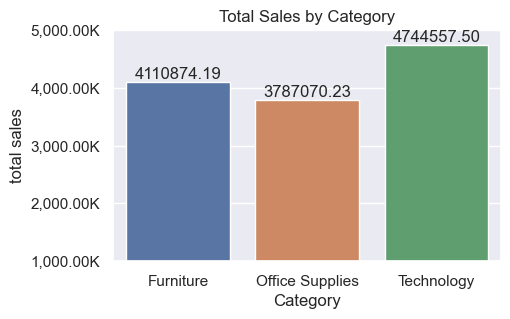

In [50]:
df1.visualize_sales_by_category()

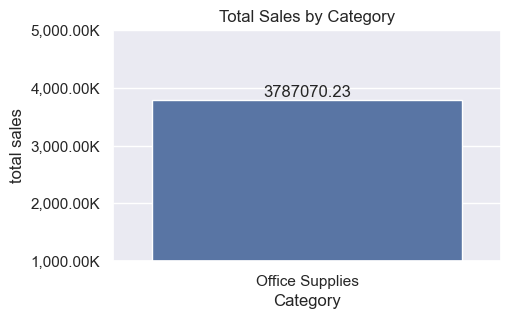

In [51]:
df1.visualize_sales_by_category(["Office Supplies"])

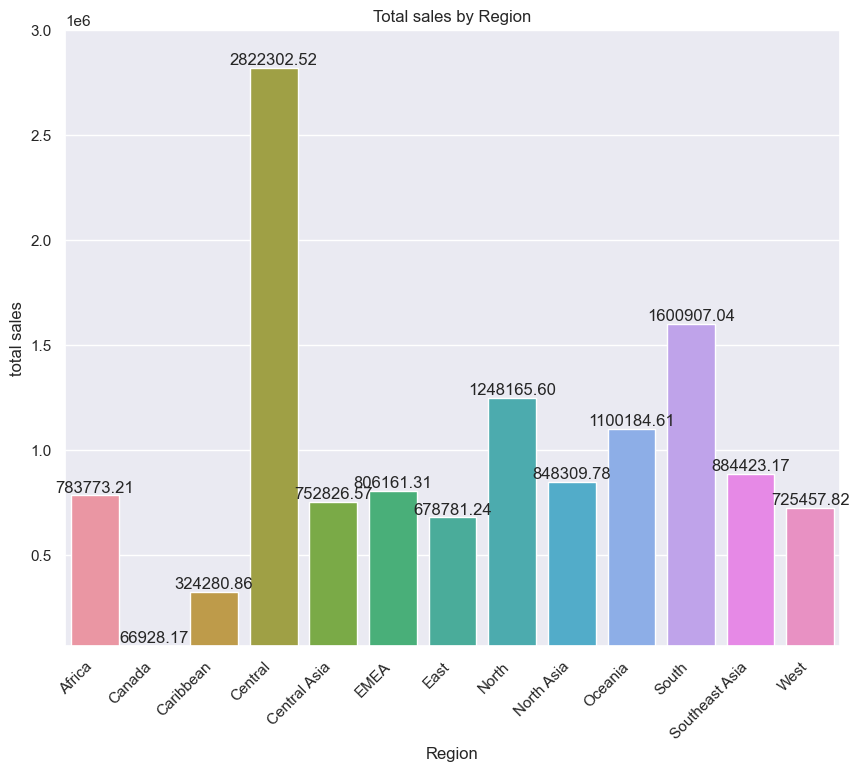

the file is saved in the working directory


<Figure size 640x480 with 0 Axes>

In [52]:
df1.visualize_sales_by_region()

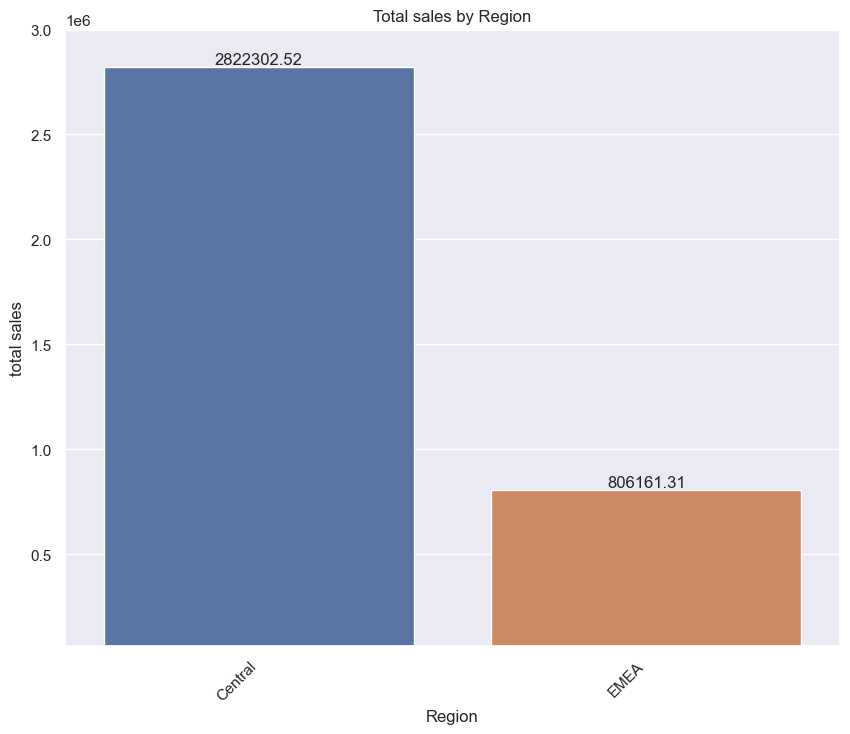

the file is saved in the working directory


<Figure size 640x480 with 0 Axes>

In [53]:
df1.visualize_sales_by_region(["EMEA","Central"])

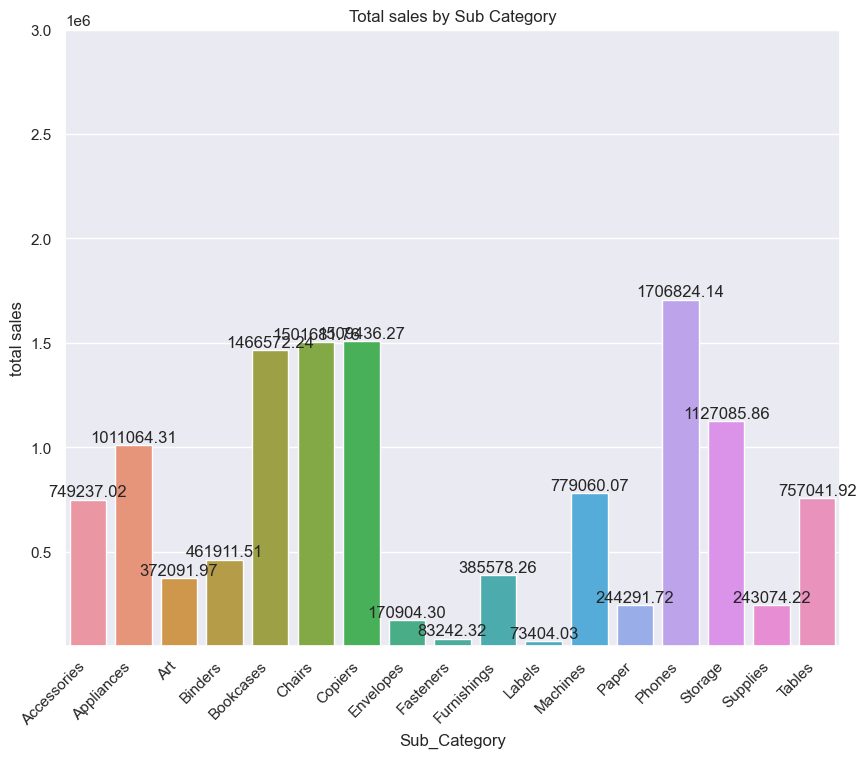

In [54]:
df1.visualize_sales_by_subcategory()

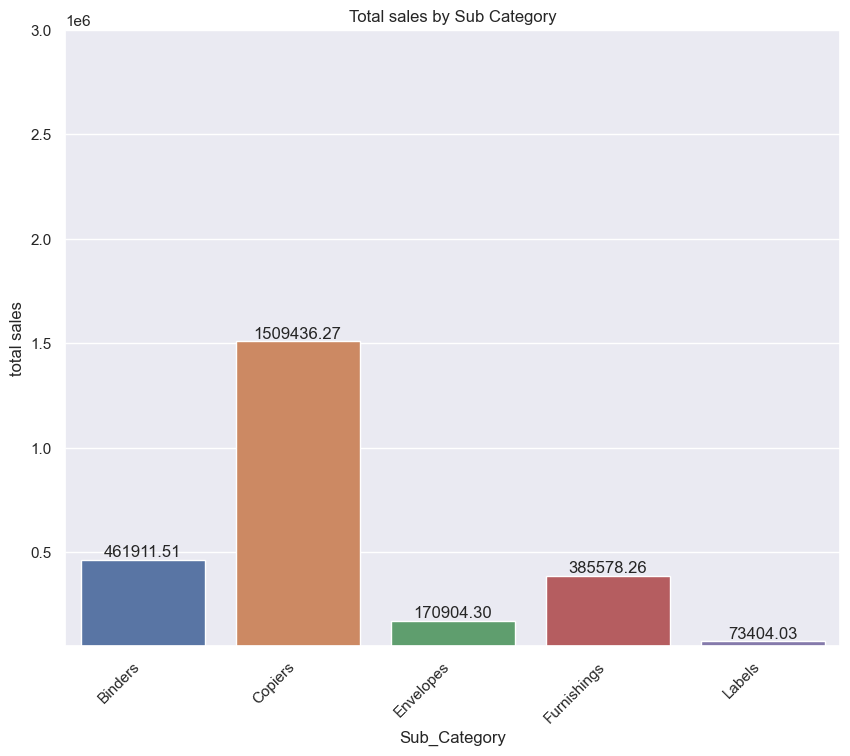

In [55]:
df1.visualize_sales_by_subcategory(["Binders","Labels","Envelopes", "Copiers", "Furnishings"])

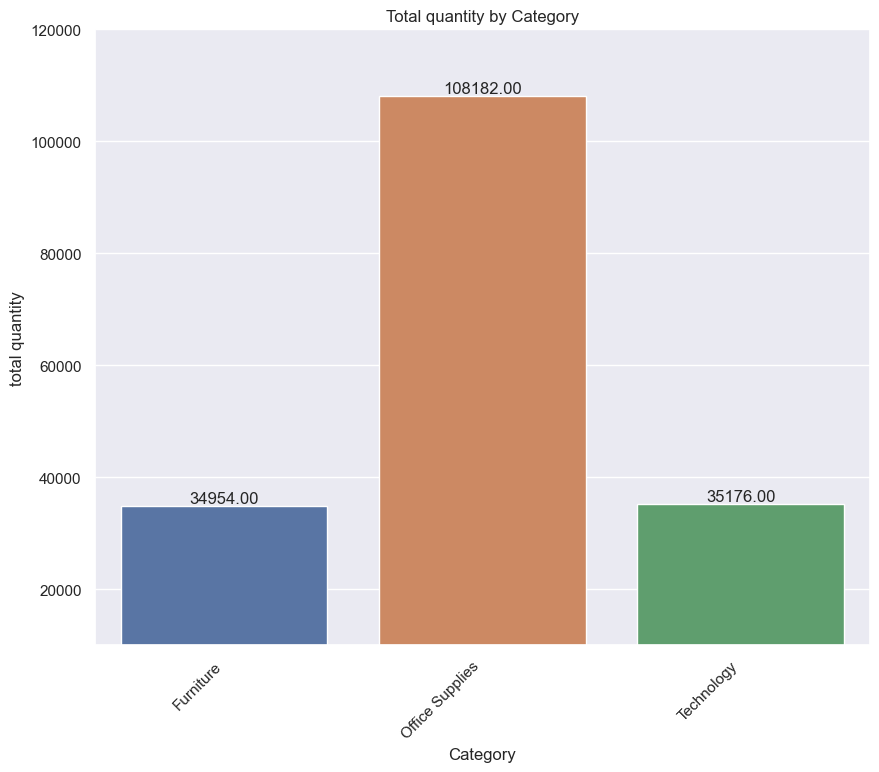

In [56]:
df1.visualize_quantity_by_category()

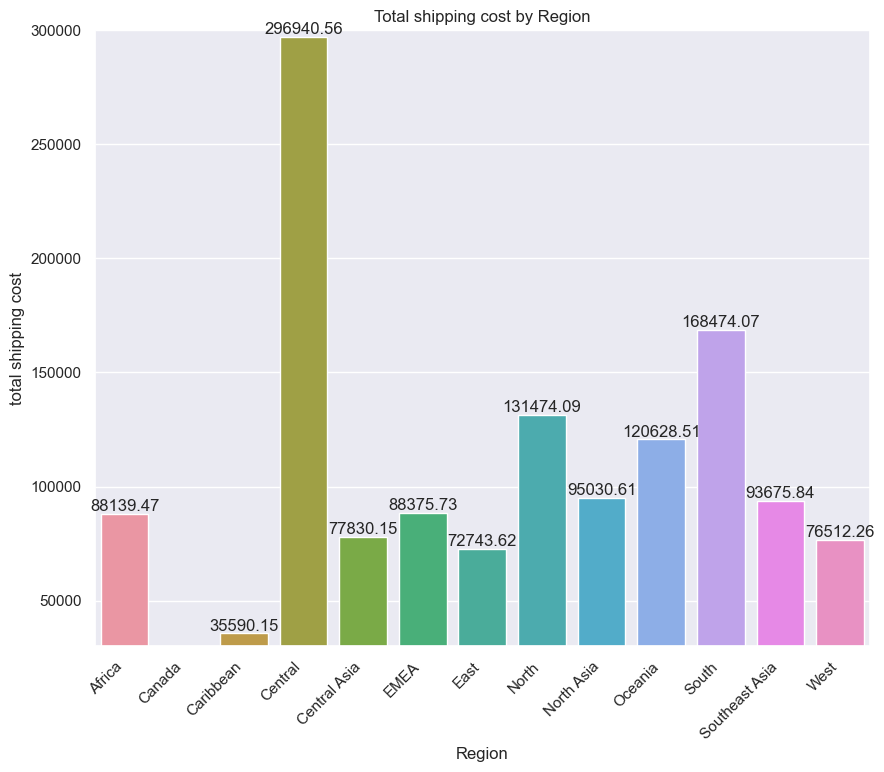

In [57]:
df1.visualize_shipping_cost_by_region()

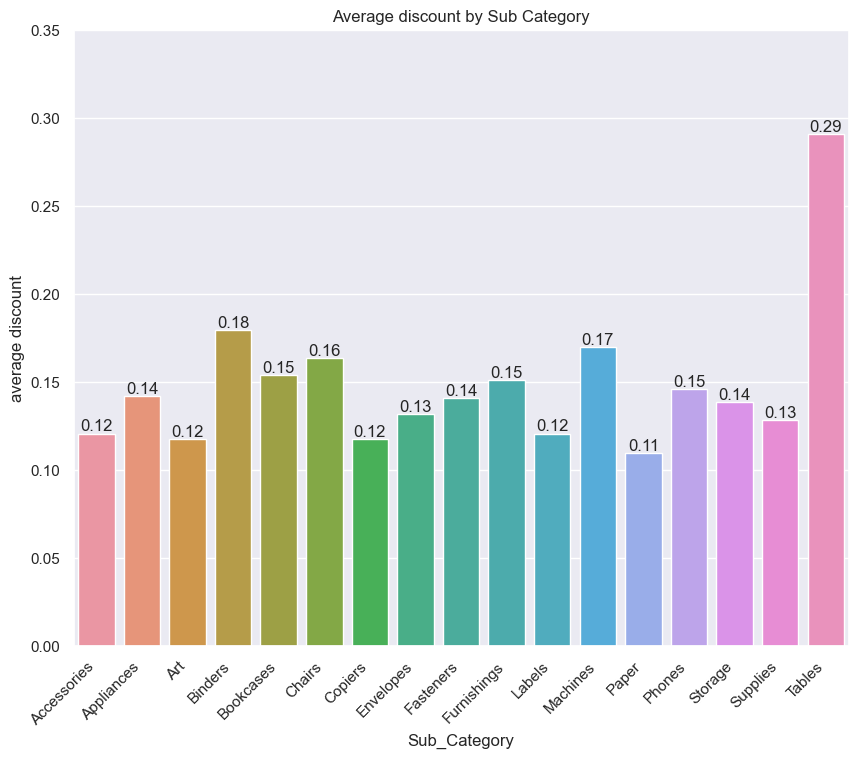

In [58]:
df1.visualize_discount_by_subcategory()

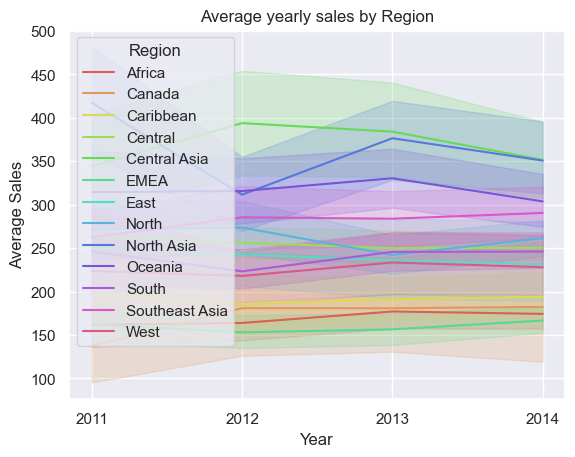

the file is saved in the working directory


<Figure size 640x480 with 0 Axes>

In [59]:
df1.visualize_yearly_avg_sales_region()

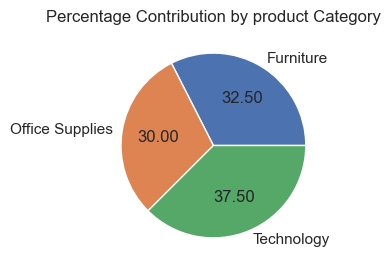

the file is saved in the working directory


<Figure size 640x480 with 0 Axes>

In [60]:
df1.visualize_category_contribution()

Date range: 2010-12-31 - 2013-08-28,  28088 rows.
      total_revenue
Year               
2011   2,259,450.90
2012   2,677,438.69
2013   2,027,871.64
Summary of Total revenue by year for the date range: 2010-12-31 - 2013-08-28
                 total_sales  average_sales  total_profit  average_profit
Category                                                                 
Furniture       2,266,355.95         421.80    160,894.44           29.94
Office Supplies 2,083,610.79         121.51    280,279.63           16.34
Technology      2,614,794.48         469.70    373,376.73           67.07
Summary of Total and average revenue/profit by category for the date range: 2010-12-31 - 2013-08-28
                total_sales  average_sales  total_profit  average_profit
Region                                                                  
Africa           415,226.10         170.17     41,150.97           16.87
Canada            36,742.83         165.51     10,428.33           46.97
Caribbean  

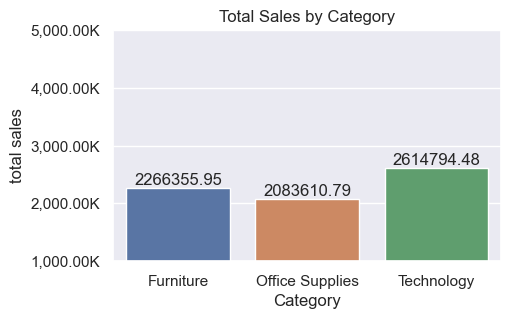

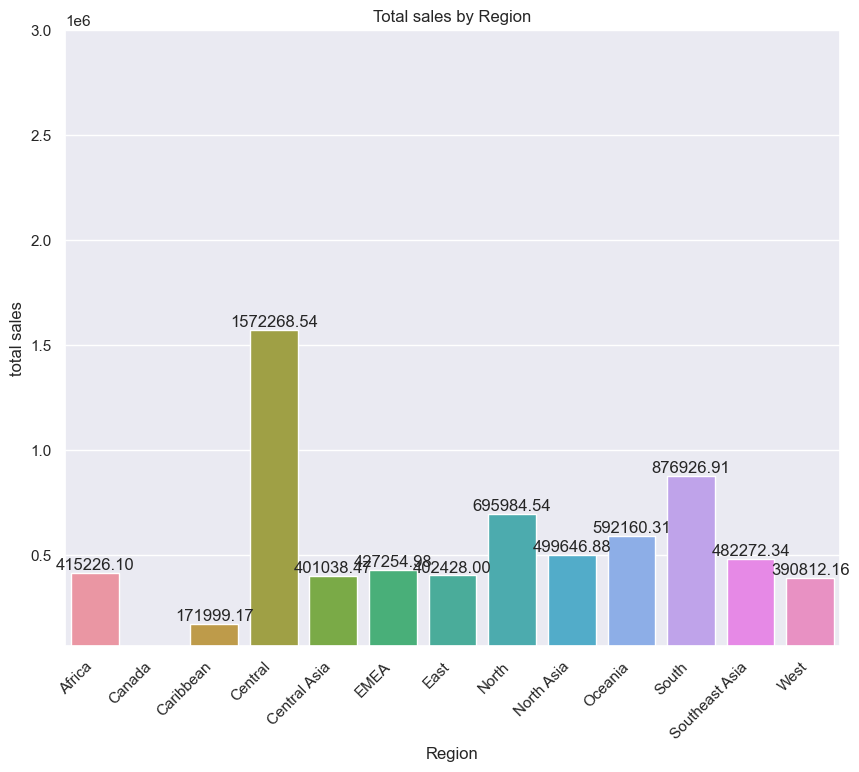

the file is saved in the working directory


<Figure size 640x480 with 0 Axes>

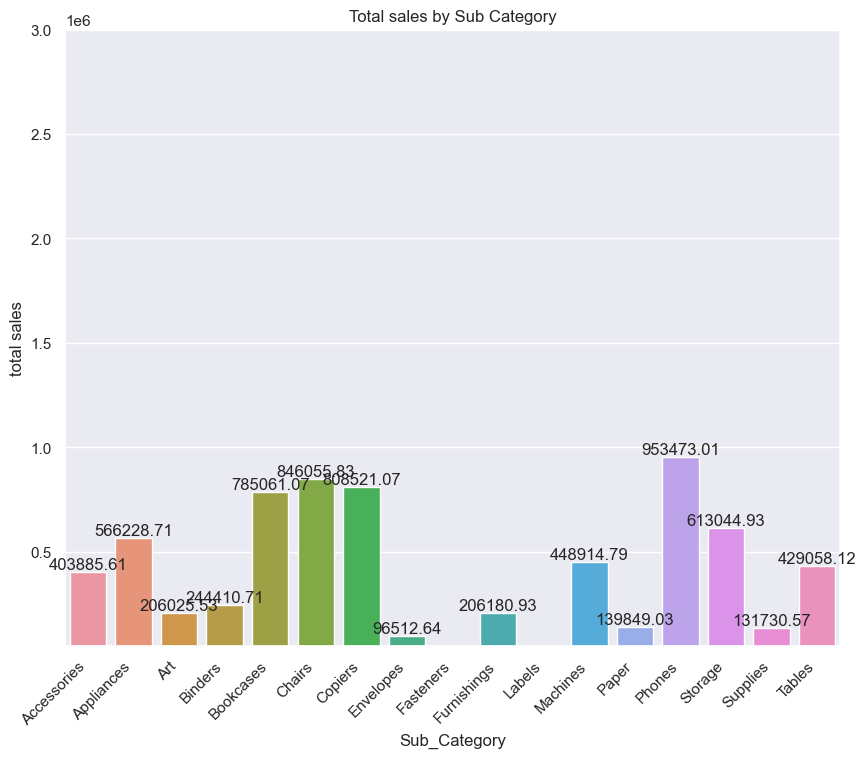

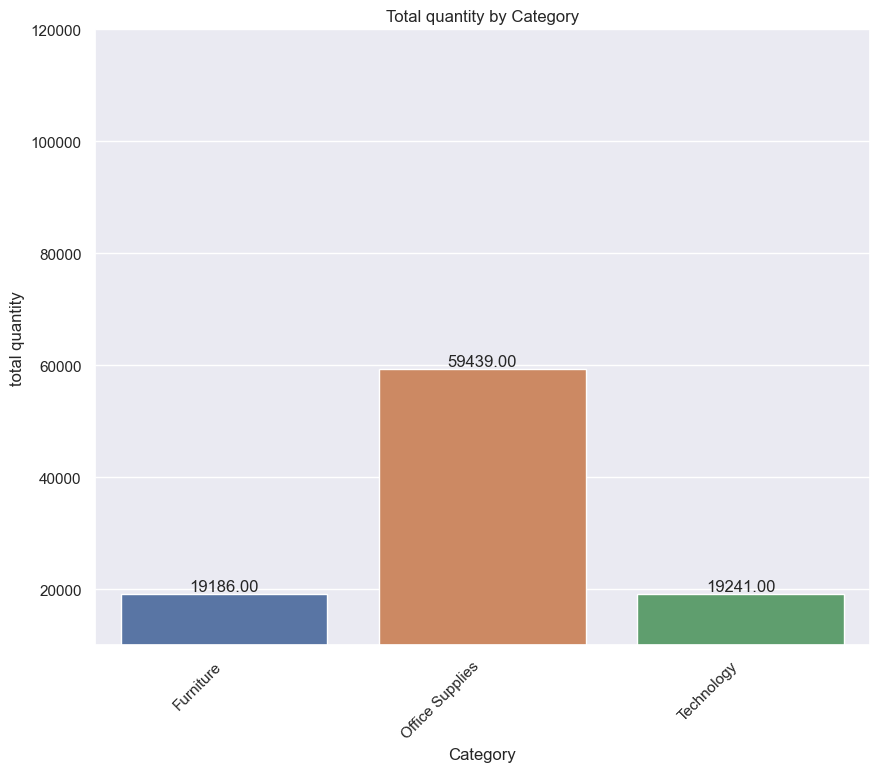

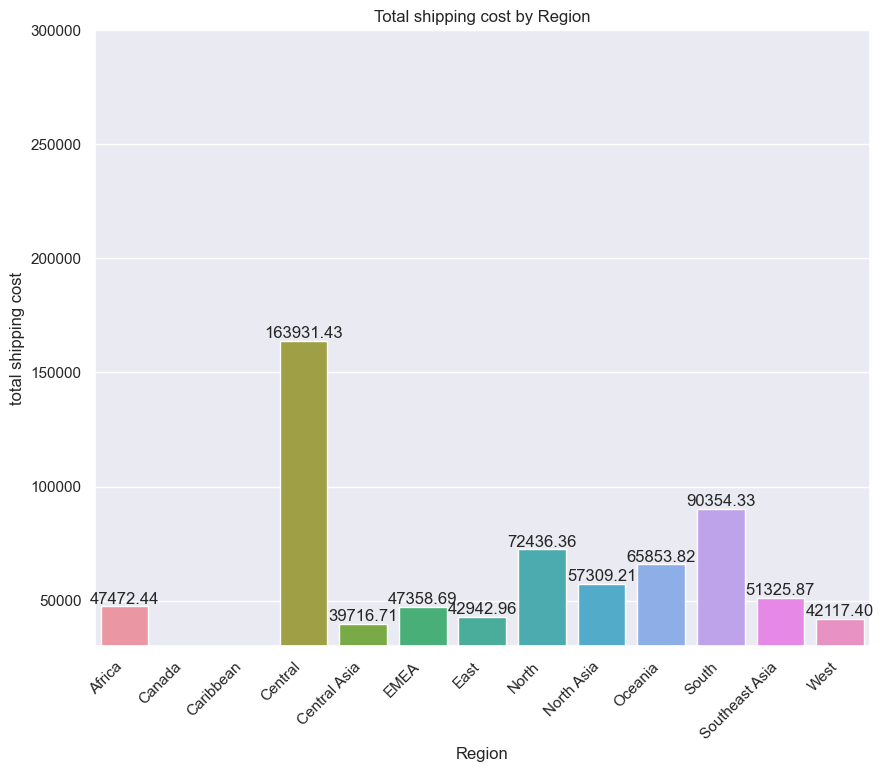

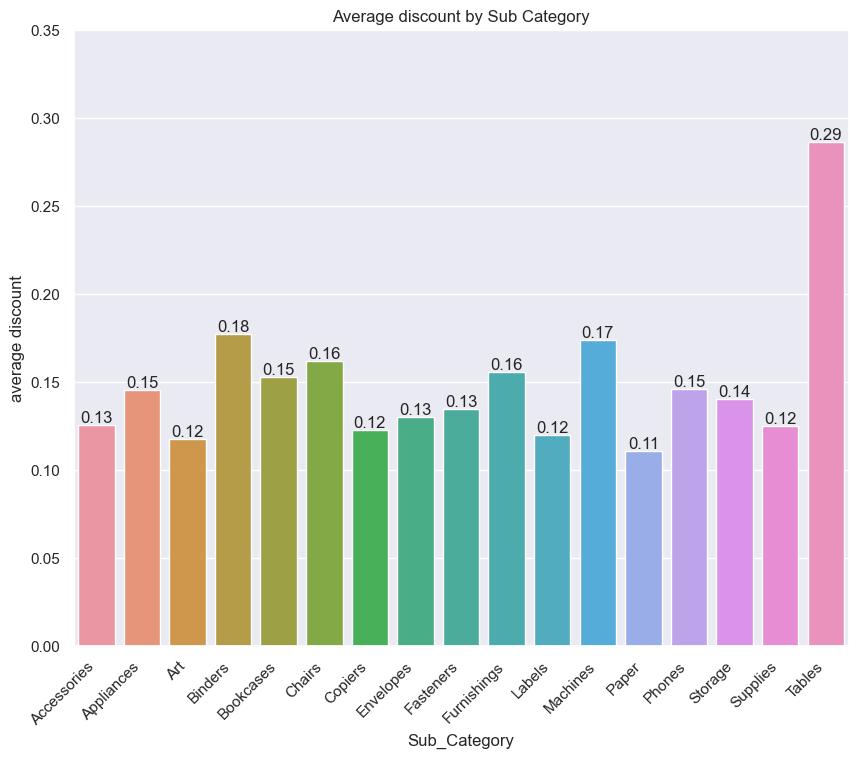

In [61]:
df1.generate_report('2010-12-31', '2013-08-28')

## Have completed to the best of my understanding. All questions are completed. 
## I would like to receive a feedback on my work one to one - also I have a few doubts that I want to clarify. 